In [5]:
import numpy as np
from brian2 import *

In [6]:
param_init = {'a': 60, 'b': 100}

In [7]:
for param, val in param_init.items():
    print(param, val)

a 60
b 100


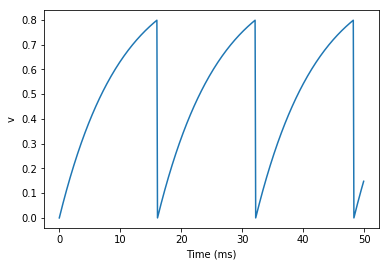

In [13]:
start_scope()

tau = 10*ms
eqs = Equations('''
dv/dt = (1-v)/tau : 1
''')

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

M = StateMonitor(G, 'v', record=0)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

In [18]:
G.v=10

In [28]:
z = 'taux'

if not (z in eqs.identifiers or z in eqs.names):
    print('ok')

ok


In [19]:
eqs.names

{'v'}

In [20]:
eqs.identifiers

{'tau'}

In [10]:
G.set_states({'v':10})

## Try Setting Up v

In [34]:
start_scope()

In [35]:
# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
VT = -63*mV

dt = 0.01*ms

In [36]:
# Generate a step-current input and an "experimental" voltage trace
input_current = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA

params_correct = {'gl': float(5e-5*siemens*cm**-2 * area),
                  'g_na': float(100*msiemens*cm**-2 * area),
                  'g_kd': float(30*msiemens*cm**-2 * area)}

defaultclock.dt = dt

In [37]:
# The model
eqsHH = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I(t))/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
g_na : siemens (constant)
g_kd : siemens (constant)
gl   : siemens (constant)
''')

In [38]:
I = TimedArray(input_current, dt=dt)

In [47]:
G = NeuronGroup(1, eqsHH, method='exponential_euler')
# G.v = El
G.set_states({'v': El})
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)
run(25*ms)

In [48]:
voltage = mon.v[0]/mV
voltage += np.random.randn(len(voltage))


inp_trace = np.array([input_current])
n0, n1 = inp_trace.shape

out_trace = np.array(voltage[:n1])

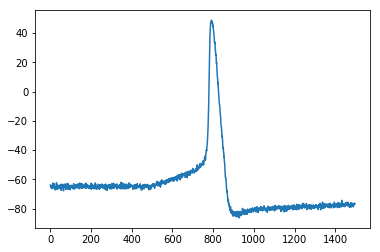

In [49]:
plot(out_trace);